In [2]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2021',
               data_source='yahoo')
print(goog)

                   High          Low         Open        Close      Volume  \
Date                                                                         
2004-08-19    51.835709    47.800831    49.813290    49.982655  44871361.0   
2004-08-20    54.336334    50.062355    50.316402    53.952770  22942874.0   
2004-08-23    56.528118    54.321388    55.168217    54.495735  18342897.0   
2004-08-24    55.591629    51.591621    55.412300    52.239197  15319808.0   
2004-08-25    53.798351    51.746044    52.284027    52.802086   9232276.0   
...                 ...          ...          ...          ...         ...   
2020-12-24  1746.000000  1729.109985  1735.000000  1738.849976    346800.0   
2020-12-28  1790.728027  1746.334961  1751.635010  1776.089966   1393000.0   
2020-12-29  1792.439941  1756.089966  1787.790039  1758.719971   1299400.0   
2020-12-30  1765.094971  1725.599976  1762.010010  1739.520020   1306100.0   
2020-12-31  1758.930054  1735.420044  1735.420044  1751.880005  

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
%config InlineBackend.figure_format = 'svg'

In [4]:
import pandas as pd

<AxesSubplot:xlabel='Date'>

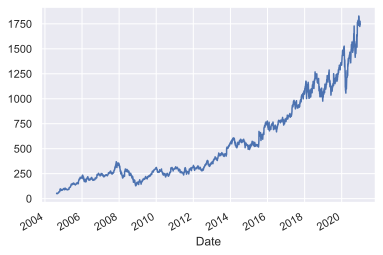

In [5]:
goog = goog['Close']
goog.plot()

In [6]:
goog.resample('Q').mean() # Q: Quarter 1분기
    
goog.resample('H').max() # H : Hour 1시간

Date
2004-08-19 00:00:00      49.982655
2004-08-19 01:00:00            NaN
2004-08-19 02:00:00            NaN
2004-08-19 03:00:00            NaN
2004-08-19 04:00:00            NaN
                          ...     
2020-12-30 20:00:00            NaN
2020-12-30 21:00:00            NaN
2020-12-30 22:00:00            NaN
2020-12-30 23:00:00            NaN
2020-12-31 00:00:00    1751.880005
Freq: H, Name: Close, Length: 143473, dtype: float64

In [7]:
print(pd.date_range('2021-11-01', periods=10, freq="BM"))

DatetimeIndex(['2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2022-03-31', '2022-04-29', '2022-05-31', '2022-06-30',
               '2022-07-29', '2022-08-31'],
              dtype='datetime64[ns]', freq='BM')


In [8]:
print(pd.date_range('2021-11-01', periods=10, freq="1H30T"))

DatetimeIndex(['2021-11-01 00:00:00', '2021-11-01 01:30:00',
               '2021-11-01 03:00:00', '2021-11-01 04:30:00',
               '2021-11-01 06:00:00', '2021-11-01 07:30:00',
               '2021-11-01 09:00:00', '2021-11-01 10:30:00',
               '2021-11-01 12:00:00', '2021-11-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')


In [9]:
from pandas.tseries.offsets import DateOffset

ts = pd.Timestamp('2021-10-31 23:28:30')
ts - DateOffset(years=71, month=4, days=5, hours=19, minutes=28, seconds=30)

Timestamp('1950-04-25 04:00:00')

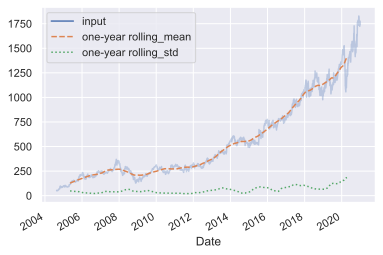

In [10]:
"""
Rolling Windows
"""

rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input':goog,
                    'one-year rolling_mean': rolling.mean(),
                    'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)